# Testing Python map frameworks
- Plotly
- folium
- basemap

In [34]:
%matplotlib inline

import os
import pandas as pd
import folium
import matplotlib
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.io.img_tiles import OSM
import folium
import numpy as np

In [36]:
plt.rcParams['figure.figsize'] = (12, 10)

In [4]:
def haversine(lon1, lat1, lon2, lat2):
    # Distance between two points
    # assuming that the input is in WGS84 and is equivalent
    # to SIRGAS 2000
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    a = np.sin((lat2 - lat1 )/2.)**2 + np.cos(lat1) * np.cos(lat2) * np.sin((lon2 - lon1)/2.)**2
    c = 2. * np.arcsin(np.sqrt(a)) 
    km = 6367. * c
    return km


In [5]:
coords = list(
    zip(
        np.random.uniform(low=-23.0, high=-24.0, size=(10)), 
        np.random.uniform(low=-44.0, high=-46.0, size=(10)),
        np.random.uniform(low=-23.0, high=-25.0, size=(10)),
        np.random.uniform(low=-44.0, high=-47.0, size=(10))
    ),
)

In [6]:
df = pd.DataFrame(coords, index=range(10), columns=['lat_ini', 'lon_ini', 'lat_end', 'lon_end'])

In [7]:
df['dist'] = df.apply(lambda row: haversine(row['lon_ini'],row['lat_ini'],row['lon_end'],row['lat_end'] ), axis=1)

In [8]:
df

,lat_ini,lon_ini,lat_end,lon_end,dist
0,-23.340293,-45.613800,-23.967344,-44.811018,107.389932
1,-23.373336,-44.047706,-24.261444,-44.784021,123.866724
2,-23.103331,-44.645269,-24.402253,-46.505293,237.956814
3,-23.017119,-45.998663,-24.570542,-45.348192,184.859864
4,-23.028937,-45.924863,-23.859696,-46.193867,96.305654
5,-23.357086,-44.179643,-23.146422,-46.669314,255.266353
6,-23.597165,-45.920687,-23.464654,-44.095444,186.544688
7,-23.945186,-45.513093,-23.709571,-46.285262,82.745252
8,-23.131538,-45.399123,-23.841850,-46.871100,169.518183
9,-23.888014,-44.464350,-23.916297,-46.640568,221.112758


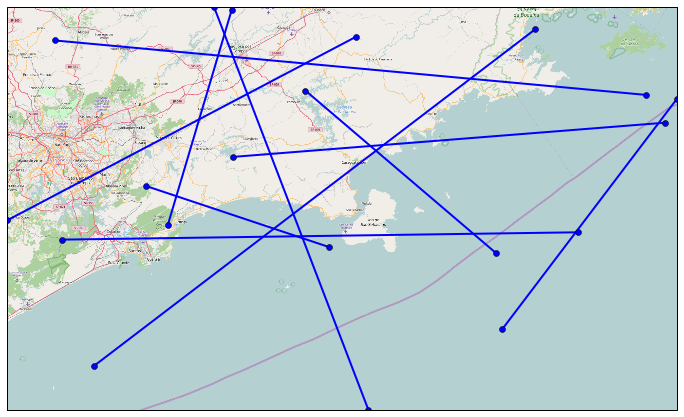

In [41]:
# Cartopy example
tiler = OSM()
mercator = tiler.crs


ax = plt.axes(projection=mercator)
extend = (-46.871099845400906, -44.04770602852918, -24.57054154739055, -23.01711887727721)
#ax.coastlines('10m')
ax.add_image(tiler, 10)

for key, row in df.iterrows():
        plt.plot(
            [row.lon_end, row.lon_ini], [row.lat_end, row.lat_ini],
             color='blue', linewidth=2, marker='o',
             transform=ccrs.Geodetic(),
         )

ax.set_extent(extend)
plt.show()

In [29]:
zoom_start = 12

mapa = folium.Map(location=[-23.9, -46.3], zoom_start=zoom_start)

kw = dict(opacity=1.0, weight=4)

lines = []

start_points = list(zip(df['lat_ini'], df['lon_ini'] ))
end_points = list(zip(df['lat_end'], df['lon_end'] ))

for start_point, end_point in zip(start_points, end_points):
    lines.append(
        folium.PolyLine(locations=[
                start_point,end_point
            ], color='red', **kw)
    )


ml = folium.MultiPolyLine(locations=list(zip(start_points, end_points)), color='blue')
    
# for line in lines:
#     mapa.add_children(line)
mapa.add_children(ml)

mapa